In [75]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

In [76]:
model_path = "model.h5"
model = tf.keras.models.load_model(model_path)

In [77]:
class_names = ["benign", "malignant"]

In [78]:
def preprocess_image(img_path, img_height=224, img_width=224):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

In [79]:
def make_prediction(img_path):
  img_array = preprocess_image(img_path)
  predictions = model.predict(img_array)

  predicted_class_idx = np.argmax(predictions[0])
  confidence = predictions[0][predicted_class_idx]
  predicted_class = class_names[predicted_class_idx]

  return predicted_class, confidence

(-0.5, 3023.5, 4031.5, -0.5)

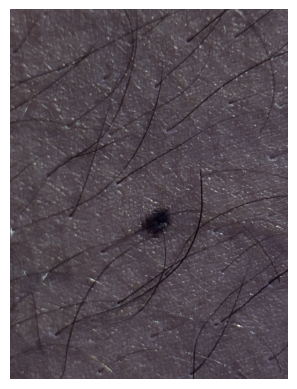

In [80]:
img_path = "/data/my_mole.jpg"
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')

In [90]:
predicted_class, confidence = make_prediction(img_path)
print(f"Predicted class: {predicted_class}, Confidence: {round(confidence * 100, 2)}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: benign, Confidence: 75.6%
